In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Set your Kaggle username and API key as environment variables
import os
os.environ['KAGGLE_USERNAME'] = 'nithishkumar88'
os.environ['KAGGLE_KEY'] = '0fe6f913143e13321009cce167f41f73'

# Authenticate with the Kaggle API
api = KaggleApi()
api.authenticate()


In [3]:
!kaggle datasets download -d pranavks55/flickr8k

 98% 1.05G/1.07G [00:11<00:00, 112MB/s]
100% 1.07G/1.07G [00:11<00:00, 96.6MB/s]


In [4]:
!unzip '*.zip' -d /content/flickr8k

Streaming output truncated to the last 5000 lines.
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2844963839_ff09cdb81f.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2845691057_d4ab89d889.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2845845721_d0bc113ff7.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2846037553_1a1de50709.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2846785268_904c5fcf9f.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2846843520_b0e6211478.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2847514745_9a35493023.jpg  
  inflating: /content/flickr8k/145129_343604_upload_Flickr_Da

In [ ]:
!ls

flickr8k  flickr8k.zip	sample_data


In [ ]:
from glob import glob

images_path = '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/'
images = glob(images_path + '*.jpg')
len(images)


8091

In [ ]:
images[:5]

['/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/3319899418_4bcf1b00d8.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/3000428313_8a1e65e20e.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/3593538248_dffa1a5ed4.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/236476706_175081ce18.jpg',
 '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/2315807231_6948b3f3a5.jpg']

In [ ]:
import cv2
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    

1/1 [==============================] - 0s 25ms/step
50
1/1 [==============================] - 0s 55ms/step
100
1/1 [==============================] - 0s 24ms/step
150
1/1 [==============================] - 0s 29ms/step
200
1/1 [==============================] - 0s 23ms/step
250
1/1 [==============================] - 0s 23ms/step
300
1/1 [==============================] - 0s 25ms/step
350
1/1 [==============================] - 0s 21ms/step
400
1/1 [==============================] - 0s 30ms/step
450
1/1 [==============================] - 0s 22ms/step
500
1/1 [==============================] - 0s 23ms/step
550
1/1 [==============================] - 0s 30ms/step
600
1/1 [==============================] - 0s 27ms/step
650
1/1 [==============================] - 0s 41ms/step
700
1/1 [==============================] - 0s 25ms/step
750
1/1 [==============================] - 0s 22ms/step
800
1/1 [==============================] - 0s 39ms/step
850
1/1 [==============================] - 0s 34ms/st

In [ ]:
len(images_features)

1500

In [ ]:
caption_path = '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

40461

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

1500

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

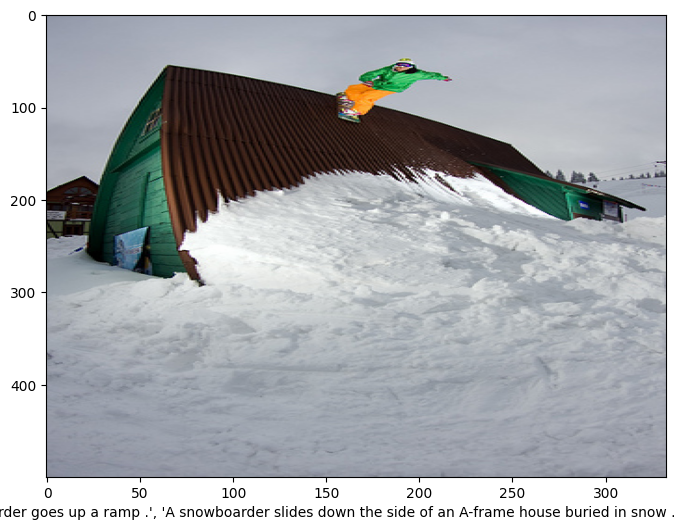

In [ ]:
for k in images_features.keys():
    plt.figure(figsize=(8, 6))  # Set the size of the figure
    
    img_name = '/content/flickr8k/145129_343604_upload_Flickr_Data/Flickr_Data/Images/' + k
    
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img, aspect='auto')  # Set the aspect ratio to 'auto' to fit the image
    
    break


In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

3991

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [ ]:
len(new_dict)

3991

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'1016887272_03199f49c4.jpg': [[1, 2, 3, 4, 5, 6, 7, 2, 8, 9, 10],
  [1, 2, 11, 4, 12, 13, 14, 7, 15, 2, 14, 7, 16, 9, 10],
  [1, 2, 11, 4, 12, 7, 2, 14, 17, 5, 18, 19, 10],
  [1, 20, 21, 13, 22, 2, 14, 23, 24, 25, 18, 26, 27, 28, 29, 9, 10],
  [1,
   30,
   21,
   31,
   2,
   32,
   13,
   7,
   28,
   14,
   17,
   28,
   18,
   31,
   33,
   34,
   35,
   36,
   28,
   37,
   9,
   10]],
 '103195344_5d2dc613a3.jpg': [[1,
   2,
   18,
   31,
   38,
   39,
   40,
   41,
   42,
   2,
   43,
   44,
   45,
   31,
   46,
   4,
   2,
   47,
   48,
   9,
   10],
  [1, 2, 18, 49, 35, 50, 2, 51, 52, 2, 53, 54, 4, 55, 56, 48, 9, 10],
  [1, 2, 18, 49, 57, 2, 58, 59, 9, 10],
  [1, 2, 18, 40, 31, 46, 4, 2, 60, 53, 31, 46, 4, 2, 48, 9, 10],
  [1,
   28,
   18,
   61,
   28,
   62,
   39,
   40,
   31,
   2,
   63,
   64,
   31,
   46,
   4,
   55,
   44,
   53,
   65,
   9,
   10]],
 '103205630_682ca7285b.jpg': [[1, 2, 66, 39, 67, 68, 69, 15, 28, 70, 9, 10],
  [1, 71, 72, 13, 73, 42, 74, 55, 70, 

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 2, 8, 9, 10]
[1, 2, 11, 4, 12, 13, 14, 7, 15, 2, 14, 7, 16, 9, 10]
[1, 20, 21, 13, 22, 2, 14, 23, 24, 25, 18, 26, 27, 28, 29, 9, 10]
[1, 30, 21, 31, 2, 32, 13, 7, 28, 14, 17, 28, 18, 31, 33, 34, 35, 36, 28, 37, 9, 10]
[1, 2, 18, 175, 15, 2, 176, 31, 2, 169, 170, 177, 2, 178, 179, 35, 2, 152, 180, 61, 55, 181, 182, 9, 10]
[1, 2, 18, 39, 85, 61, 324, 325, 326, 86, 118, 88, 17, 28, 6, 307, 201, 39, 163, 327, 5, 4, 28, 71, 328, 31, 28, 329, 9, 10]
[1, 2, 18, 31, 2, 38, 330, 35, 416, 352, 374, 2, 222, 31, 38, 264, 35, 2, 417, 330, 31, 46, 4, 2, 415, 239, 61, 418, 385, 419, 9, 10]
[1, 2, 38, 149, 39, 244, 41, 42, 2, 178, 35, 146, 149, 331, 39, 86, 118, 55, 397, 358, 31, 28, 78, 84, 24, 2, 448, 35, 693, 2258, 307, 9, 10]


In [ ]:
MAX_LEN

33

In [ ]:
captions_dict

{'1016887272_03199f49c4.jpg': [[1, 2, 3, 4, 5, 6, 7, 2, 8, 9, 10],
  [1, 2, 11, 4, 12, 13, 14, 7, 15, 2, 14, 7, 16, 9, 10],
  [1, 2, 11, 4, 12, 7, 2, 14, 17, 5, 18, 19, 10],
  [1, 20, 21, 13, 22, 2, 14, 23, 24, 25, 18, 26, 27, 28, 29, 9, 10],
  [1,
   30,
   21,
   31,
   2,
   32,
   13,
   7,
   28,
   14,
   17,
   28,
   18,
   31,
   33,
   34,
   35,
   36,
   28,
   37,
   9,
   10]],
 '103195344_5d2dc613a3.jpg': [[1,
   2,
   18,
   31,
   38,
   39,
   40,
   41,
   42,
   2,
   43,
   44,
   45,
   31,
   46,
   4,
   2,
   47,
   48,
   9,
   10],
  [1, 2, 18, 49, 35, 50, 2, 51, 52, 2, 53, 54, 4, 55, 56, 48, 9, 10],
  [1, 2, 18, 49, 57, 2, 58, 59, 9, 10],
  [1, 2, 18, 40, 31, 46, 4, 2, 60, 53, 31, 46, 4, 2, 48, 9, 10],
  [1,
   28,
   18,
   61,
   28,
   62,
   39,
   40,
   31,
   2,
   63,
   64,
   31,
   46,
   4,
   55,
   44,
   53,
   65,
   9,
   10]],
 '103205630_682ca7285b.jpg': [[1, 2, 66, 39, 67, 68, 69, 15, 28, 70, 9, 10],
  [1, 71, 72, 13, 73, 42, 74, 55, 70, 

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

(96614, 96614, 96614)

In [ ]:
import numpy as np
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape

((96614, 2048), (96614, 33), (96614, 3992))

In [ ]:
X[1510]

array([0.3186515 , 0.18330722, 0.02318481, ..., 0.50601155, 1.0592585 ,
       1.3222024 ], dtype=float32)

In [ ]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from tensorflow.keras.layers import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 33, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 128)           510976    
                                                                 
 lstm (LSTM)                 (None, 33, 256)           394240    
                            

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
189/189 [==============================] - 33s 129ms/step - loss: 5.3251 - accuracy: 0.1164
Epoch 2/50
189/189 [==============================] - 16s 85ms/step - loss: 5.1589 - accuracy: 0.1208
Epoch 3/50
189/189 [==============================] - 16s 83ms/step - loss: 5.0920 - accuracy: 0.1218
Epoch 4/50
189/189 [==============================] - 16s 82ms/step - loss: 5.0130 - accuracy: 0.1202
Epoch 5/50
189/189 [==============================] - 15s 77ms/step - loss: 4.9380 - accuracy: 0.1214
Epoch 6/50
189/189 [==============================] - 15s 77ms/step - loss: 4.8804 - accuracy: 0.1206
Epoch 7/50
189/189 [==============================] - 15s 78ms/step - loss: 4.8273 - accuracy: 0.1211
Epoch 8/50
189/189 [==============================] - 15s 78ms/step - loss: 4.7775 - accuracy: 0.1208
Epoch 9/50
189/189 [==============================] - 15s 79ms/step - loss: 4.7354 - accuracy: 0.1206
Epoch 10/50
189/189 [==============================] - 15s 77ms/step - loss: 4.63

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

In [ ]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)

Output hidden; open in https://colab.research.google.com to view.